# Phonon magnitude analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon displacement vectors at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of the magnitude of these vectors for each k-point.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Change as necessary
KPT = 'Gamma'; th_min = 0.25; th_max = 10.0
WHICH_MODE = 5

In [33]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'/Users/jonathanlu/Documents/tmos2_2/thspc/{KPT}/thspc_mags.npy'
dataset = np.load(path)
ntheta, nmodes, n_r = list(dataset.shape)[:-1]
print("Dataset shape:", dataset.shape)
print("Number of sampled twist angles:", ntheta)
print("Real space mesh size:", n_r)
print("Number of modes:", nmodes)

phonons = np.load(f'/Users/jonathanlu/Documents/tmos2_2/thspc/{KPT}/thspc_phonons.npy')
mesh = np.load(f'/Users/jonathanlu/Documents/tmos2_2/thspc/{KPT}/thspc_mesh.npy')

Dataset shape: (301, 20, 1521, 3)
Number of sampled twist angles: 301
Real space mesh size: 1521
Number of modes: 20


Analyzing theta = 0.38 (idx=4)


<Figure size 432x288 with 0 Axes>

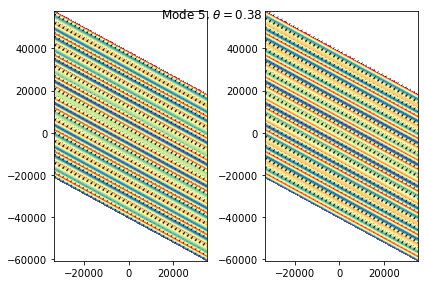

In [34]:
# Visualize the real-space phonons
THETA_IDX = 4
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

plt.clf()
ph_th = phonons[THETA_IDX,:,WHICH_MODE]
fig, axes = plt.subplots(ncols=2)
for i, ax in enumerate(axes):
    ax.tricontourf(coords[:,0], coords[:,1], ph_th[i,:,2], cmap='Spectral', levels=501)
    ax.quiver(coords[:,0], coords[:,1],    # positions
              ph_th[i,:,0], ph_th[i,:,1], 
              width=0.0045, headlength=6, headwidth=3, color='black') # arrows
plt.suptitle(fr"Mode {WHICH_MODE}, $\theta = {thetas[THETA_IDX]}$")
fig.tight_layout()
plt.show()

In [35]:
max_uz = np.max(dataset[:,:,:,-1], axis=2) # maximum displacement magnitude in z-direction
mean_uz = np.mean(dataset[:,:,:,-1], axis=2) # same but average
print(f"max_uz shape: {max_uz.shape}")

max_uz shape: (301, 20)


<Figure size 432x288 with 0 Axes>

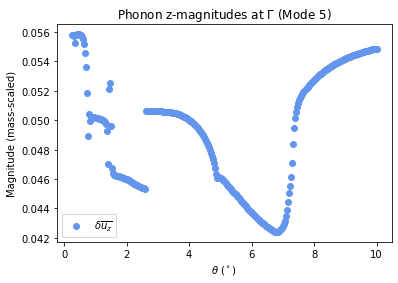

In [36]:
assert 0 <= WHICH_MODE < nmodes, "Invalid mode!"
thetas = np.linspace(th_min, th_max, ntheta)
plt.clf()
_, ax = plt.subplots()
ax.set_title(f"Phonon z-magnitudes at {log_name} (Mode {WHICH_MODE})")
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'Magnitude (mass-scaled)')
# ax.scatter(thetas, max_uz[:,WHICH_MODE], color='black', label=r'$\delta u_z^*$')
ax.scatter(thetas, mean_uz[:,WHICH_MODE], color='cornflowerblue', label=r'$\delta \overline{u_z}$')
ax.legend()
plt.show()


In [37]:
max_uz[-1]

array([2.19521152e-02, 5.09144915e-02, 5.88357343e-05, 1.03482169e-02,
       1.02256317e-02, 6.35430135e-02, 9.11152539e-02, 9.11152539e-02,
       1.23155190e-01, 9.89555030e-02, 9.89555030e-02, 1.06915101e-01,
       9.35757714e-02, 9.35757714e-02, 1.03825924e-01, 1.22267140e-01,
       1.03101911e-01, 1.04471033e-01, 6.82153159e-03, 7.77341588e-03])